## Wstęp

Dany notatnik zawiera wstępne przetwarzanie  oraz przygotowanie danych do przyszłęgo zbudowania modelu uczącego

### Spis operacji przeprowadzonych w danym notatniku:
- Pobranie i wczytanie danych
- Arbitralna filtracja danych potrzebnych do zbudowania modelu
- Usunięcie rekordów zawierające braki w polach 
- Transformacja danych do używalnej postaci
- Transformacja zmennej celi (zmniejszenie liczby klas)



## Importowanie potrzebnych bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Pobranie i wczytanie danych

Archiwum ze zbiorem danych został pobrany z otwartego żródła [kaggle.com](https://www.kaggle.com/karangadiya/fifa19)

Wczytanie zbioru danych z pliku csv od zmennej **fifa_data**

In [2]:
fifa_data = pd.read_csv('data.csv')

In [3]:
fifa_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa_data.shape

(18207, 89)

Na początku nasz zbiór danych zawiera 18207 rekordów oraz 89 cech. liczba cech oczywiśćie jest bardzo duża, w nasępnych częściach pracy będziemy starali zmniejszyć liczbe wymiarów.

## Filtracja kolumn potrzebnych do zbudowania modelu

Dany zbiór danych jest dość obszerny i zawiera dużo informacji dotyczącej każdego gracza. Ale część tych danych nie jest potrzebna oraz nie nadaje do wykorzystania dla naszej celi, np imię piłkarza albo zdjęcie. Wylistowanie wszystkich pól znajduję się poniżej.

In [5]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

Po wstępnej analize kolumn stweirdzamy że pola wylistowane poniżej podlegają usunięciu

In [6]:
drop_columns = [
    'Unnamed: 0',
    'ID',
    'Name',
    'Photo',
    'Flag',
    'Club Logo',
    'Club',
    'Special',
    'Real Face',
    'Release Clause',
    'Joined',
    'Contract Valid Until',
    'Nationality',
    'Loaned From',
    'GKDiving',
    'GKHandling',
    'GKKicking',
    'GKPositioning',
    'GKReflexes',
    'Jersey Number',
    'Value',
    'Wage',
    'International Reputation',
]

fifa_data.drop(columns=drop_columns, inplace=True)

Docelowo nasz model **nie będzie** klasyfikował bramkarzy, wieć z naszego zbiory danych musimy usunąć wszystkich graczy z pozycją "GK" 

In [7]:
fifa_data = fifa_data[fifa_data['Position'] != 'GK']

### Dane Brakujące

Następnie przeanalizujemy czy dany zbiór zawiera dane brakujące. ilość brakujących wartości dla każdego pola jest pokazana poniżej

In [8]:
fifa_data.isnull().sum()

Age                 0
Overall             0
Potential           0
Preferred Foot     48
Weak Foot          48
Skill Moves        48
Work Rate          48
Body Type          48
Position           60
Height             48
Weight             48
LS                 60
ST                 60
RS                 60
LW                 60
LF                 60
CF                 60
RF                 60
RW                 60
LAM                60
CAM                60
RAM                60
LM                 60
LCM                60
CM                 60
RCM                60
RM                 60
LWB                60
LDM                60
CDM                60
                   ..
RB                 60
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions 

 Ilość danych brakujących jest bardzo mała w stosunku do liczby całego zbioru, więc możemy pozbyć się tych rekordów bez dużych strat. 

In [9]:
fifa_data.dropna(inplace=True)

In [10]:
fifa_data.isnull().sum().sum()

0

### Transforamcja danych

poniżej jest wylistoawanie cech typu "object", czyli typu innego od liczbowego. Dane są cechami dyskretnymi albo są zapisane w postaci tekstowej, co wymaga dalszej transformacji.

In [11]:
fifa_data.select_dtypes(include=object).columns

Index(['Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],
      dtype='object')

In [12]:
fifa_data['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

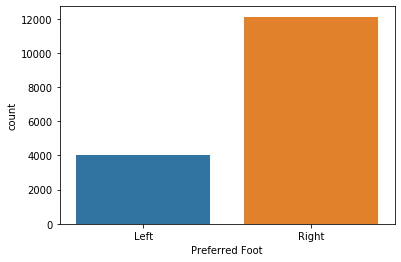

In [13]:
sns.countplot(fifa_data['Preferred Foot'])

In [14]:
fifa_data['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

#### Opis cechi:

Player Work Rate is the rate of a player's behavior on the pitch in terms of attacking and defensive works. The Work Rate is defined for Attacking (Attacking Work Rate - Abbreviated as AWR) and Defensive (Defensive Work Rate - Abbreviated as DWR) and rated between low, medium and high, which defines how a player puts effort to participates in attacks and defenses even when they are out of position.

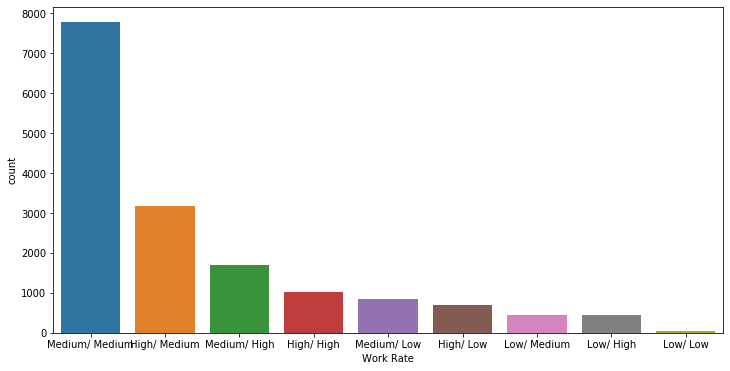

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(fifa_data['Work Rate'], 
             order=fifa_data['Work Rate'].value_counts().index)

In [16]:
fifa_data['Body Type'].unique() 

array(['Messi', 'C. Ronaldo', 'Neymar', 'Normal', 'Lean', 'Stocky',
       'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'], dtype=object)

Niektóre rekordy ”Body Type” zawierają informację nieprawidłową, co wymaga poprawienia. Dane zakłócające zamieniany na wartość ”Normal”

In [17]:
body_types = {'Stocky', 'Normal', 'Lean'}
def transform_body_type(x):
    if x in body_types:
        return x
    else:
        return 'Normal'

In [18]:
fifa_data['Body Type'] = fifa_data['Body Type'].apply(transform_body_type,)

In [19]:
fifa_data['Body Type'].unique() 

array(['Normal', 'Lean', 'Stocky'], dtype=object)

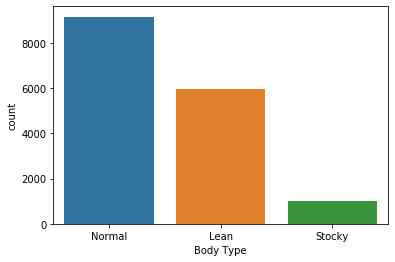

In [20]:
sns.countplot(fifa_data['Body Type'])

 konwercja kolumn  'Preferred Foot', 'Body Type' oraz 'Work Rate' z str na [pandas.Categorical](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

In [21]:
cols =  ['Preferred Foot', 'Body Type' , 'Work Rate', 'Position']
for col in cols:
    fifa_data[col] = fifa_data[col].astype('category')

In [22]:
print(type(fifa_data['Height'][0]))
fifa_data['Height'].head()

<class 'str'>


0     5'7
1     6'2
2     5'9
4    5'11
5     5'8
Name: Height, dtype: object

Tutaj możemy zauważyć że zmienna wzrostu jest podana jako wartość tekstowa oraz w zapisie jednostek pomiarówych Stanów Zjednoczonych. Następnie przeprowadzamy konwercje oraz transformację. Potem analogicznie ze zmenną wagi piłkarza.

In [23]:
# foot -> cm multiplyer = 30.48
# inch -> cm multiplyer 2.54
def transfrom_height(x):
    foot, inch = x.split("\'")
    foot, inch = int(foot), int(inch)  
    return (foot * 30.48) + (inch*2.54)

In [24]:
fifa_data['Height'] = fifa_data['Height'].apply(transfrom_height)

In [25]:
fifa_data['Height'].head()

0    170.18
1    187.96
2    175.26
4    180.34
5    172.72
Name: Height, dtype: float64

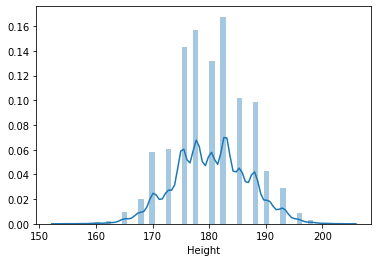

In [26]:
sns.distplot(fifa_data['Height']) 

In [27]:
len(set(fifa_data['Height'].values.tolist())) # categorical ??? 

20

In [28]:
fifa_data['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
4    154lbs
5    163lbs
Name: Weight, dtype: object

In [29]:
# lbs -> kg  divide 2.205
def transform_weight(x):
    return round(int(x.split('l')[0]) / 2.205, 2)

In [30]:
transform_weight('159lbs')

72.11

In [31]:
fifa_data['Weight'] = fifa_data['Weight'].apply(transform_weight)

In [32]:
fifa_data['Weight'].head()

0    72.11
1    82.99
2    68.03
4    69.84
5    73.92
Name: Weight, dtype: float64

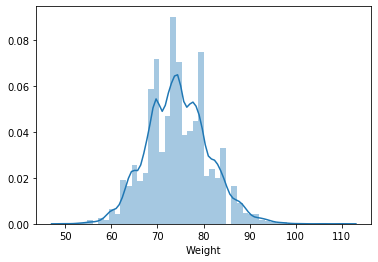

In [33]:
sns.distplot(fifa_data['Weight'])

In [34]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 0 to 18206
Data columns (total 66 columns):
Age                16122 non-null int64
Overall            16122 non-null int64
Potential          16122 non-null int64
Preferred Foot     16122 non-null category
Weak Foot          16122 non-null float64
Skill Moves        16122 non-null float64
Work Rate          16122 non-null category
Body Type          16122 non-null category
Position           16122 non-null category
Height             16122 non-null float64
Weight             16122 non-null float64
LS                 16122 non-null object
ST                 16122 non-null object
RS                 16122 non-null object
LW                 16122 non-null object
LF                 16122 non-null object
CF                 16122 non-null object
RF                 16122 non-null object
RW                 16122 non-null object
LAM                16122 non-null object
CAM                16122 non-null object
RAM                16

In [35]:
skills_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

In [36]:
fifa_data[skills_columns].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
5,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3


Widzimy że kolumny odpowiadające umiejętnościam zawodników też nie są w postaci liczbowej. Przeprowadzamy transformację odrzucając część po `+`   

In [37]:
# '88+3' return int  88
def transform_skill(x):
    return int(x.split('+')[0])

In [38]:
for col in skills_columns:
    fifa_data[col] = fifa_data[col].apply(transform_skill)

In [39]:
fifa_data[skills_columns].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88,88,88,92,93,93,93,92,93,93,...,64,61,61,61,64,59,47,47,47,59
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,89,89,89,89,89,89,89,...,65,60,60,60,65,60,47,47,47,60
4,82,82,82,87,87,87,87,87,88,88,...,77,77,77,77,77,73,66,66,66,73
5,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,60,49,49,49,60


In [40]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 0 to 18206
Data columns (total 66 columns):
Age                16122 non-null int64
Overall            16122 non-null int64
Potential          16122 non-null int64
Preferred Foot     16122 non-null category
Weak Foot          16122 non-null float64
Skill Moves        16122 non-null float64
Work Rate          16122 non-null category
Body Type          16122 non-null category
Position           16122 non-null category
Height             16122 non-null float64
Weight             16122 non-null float64
LS                 16122 non-null int64
ST                 16122 non-null int64
RS                 16122 non-null int64
LW                 16122 non-null int64
LF                 16122 non-null int64
CF                 16122 non-null int64
RF                 16122 non-null int64
RW                 16122 non-null int64
LAM                16122 non-null int64
CAM                16122 non-null int64
RAM                16122 non-nu

### Transformacja zmiennej celi

Oryginalny zbiór zawiera w sobie graczy na 28 pozycjach. Zdecydowaliśny że model docelowy będzę określał pozycję typu `Defender`,  `Middle`, `Forward` oraz stronę (`Right`, `Center`, `Left`)

In [41]:
fifa_data['Position'].unique()

[RF, ST, LW, RCM, LF, ..., RB, RAM, CF, RWB, LWB]
Length: 26
Categories (26, object): [RF, ST, LW, RCM, ..., RAM, CF, RWB, LWB]

In [42]:
# ST - Striker
# CF - Center Forwar
# RB - Right Bach
# ...
new_positions_map = {
    'ST': ['ST'],
    'CF': ['СF'],
    'LF': ['LF', 'LS', 'LW'],
    'RF': ['RF', 'RS', 'RW'],
    'CM': ['CAM', 'CDM', 'CM'],
    'LM': ['LAM', 'LDM', 'LM', 'LCM',],
    'RM': ['RAM', 'RCM', 'RDM', 'RM'],
    'CB': ['CB'],
    'LB': ['LCB', 'LWB'],
    'RB': ['RCB', 'RWB'],
}

def tranform_target_position(x):
    if x in new_positions_map.keys():
        return x
    for key, positions in new_positions_map.items():
        if x in positions:
            return key

Aby upewnić się w poprawnej transformacji zmiennej celi, do danej funkcji zostały napisane testy jednostkowy

In [43]:
%sx 'pytest'

['============================= test session starts ==============================',
 'platform linux -- Python 3.6.8, pytest-4.2.0, py-1.7.0, pluggy-0.8.1',
 'rootdir: /home/mikita/mikita/study/football-manager-ml-support, inifile:',
 'collected 25 items',
 '',
 'test_target_transform.py .........................                       [100%]',
 '',
 '========================== 25 passed in 0.04 seconds ===========================']

In [44]:
fifa_data['Position'] = fifa_data['Position'].apply(tranform_target_position)

In [45]:
fifa_data['Position'].unique()

array(['RF', 'ST', 'LF', 'RM', 'RB', 'LM', 'CB', 'CM', 'LB', 'CF'],
      dtype=object)

In [46]:
fifa_data['Position'] = fifa_data['Position'].astype('category')

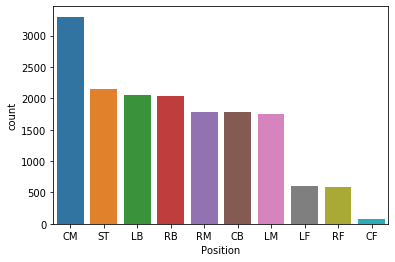

In [47]:
sns.countplot(fifa_data['Position'], 
              order=fifa_data['Position'].value_counts().index)

Możemy od razu zauważyć, że dane są w dużym stopniu niezbalansowane, ale zajmiemy się tym już w następnch częściach

Zapis Nowego zbioru do pliku

In [48]:
fifa_data.to_csv('new_data.csv', index=False)